# Silverman Mode-Finding Algorithm

Fully implemented algorithm for finding the modes of a distribution, per the process outlined in [Silverman (1981)](http://www.stat.washington.edu/wxs/Stat593-s03/Literature/silverman-81a.pdf).

A more accessible explanation can be found [here](http://adereth.github.io/blog/2014/10/12/silvermans-mode-detection-method-explained/). This script, however, is based on Silverman's original paper.

In [2]:
# Importing libraries

import seaborn as sns
import numpy as np
from scipy import stats, signal
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Data

chondrites = np.array([20.77, 22.56, 22.71, 22.99, 26.39, 27.08, 27.32, 27.33, 27.57, 27.81, 28.69,
29.36, 30.25, 31.89, 32.88, 33.23, 33.28, 33.40, 33.52, 33.83, 33.95, 34.82])

In [4]:
def find_critical_value(data, searchMax, searchStep, k):
    
    # Find original h_crit
    h_crit = binary_search(data, searchMax, searchStep, k)
        
    # Resampling from KDE distribution of data with BW = h_crit
    X = stats.gaussian_kde(dataset=data, bw_method=h_crit).resample()[0]
    
    # Finding new h_crit value for X
    new_h_crit = binary_search(X, searchMax, searchStep, k)
    
    return new_h_crit

In [5]:
def find_maxima(data, h):
    
    plt.clf()
    x_vals, y_vals = sns.kdeplot(data, bw=h).get_lines()[0].get_data()
    maxima = signal.argrelmax(y_vals)[0].tolist()
    maxima_centers = [x_vals[i] for i in maxima]
    
    return len(maxima), maxima_centers

In [6]:
def binary_search(data, searchMax, searchStep, k):
    
    searchList = np.arange(0, searchMax, searchStep)
    start = 0
    end = len(searchList) - 1
    found = False
    found_h = 12345
    
    while (start <= end) and (found==False):
        midpoint = int((start+end)/2)
        prop_h = searchList[midpoint]
        
        if find_maxima(data, prop_h)[0] == k:
            check_h = searchList[midpoint-1]
            if find_maxima(data, check_h)[0] == k:
                end = midpoint - 1
            else:
                found_h = prop_h
                found = True
        
        elif find_maxima(data, prop_h)[0] > k:
            start = midpoint + 1
        
        elif find_maxima(data, prop_h)[0] < k:
            end = midpoint - 1
    
    return found_h

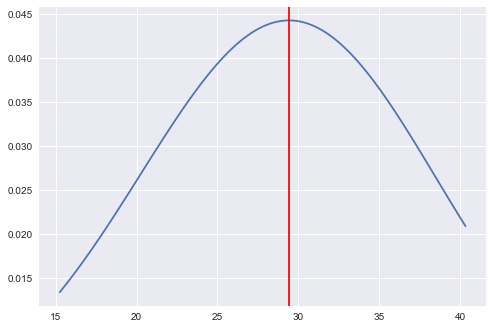

In [7]:
#Testing functions

h=1.84

_, locList = find_maxima(chondrites, h)

plt.clf()
sns.kdeplot(chondrites, kernel = 'gau', bw=h)
for loc in locList:
    plt.axvline(x=loc, color='r')
plt.show()

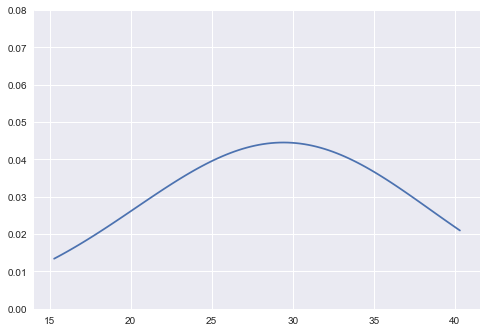

In [144]:
sns.kdeplot(chondrites, bw=1.83)
plt.ylim([0, .08])
plt.show()

In [84]:
def bootstrap(data, searchMax, searchStep, k, num_simulations):
    
    hlist = []

    for i in range(0, num_simulations):
        print(i)
        hlist = hlist + [find_critical_value(chondrites, 10, 0.01, 2)]
        #modesList = [find_maxima(chondrites, h)[0] for h in hlist]
        
    return hlist, modesList